### Selecting the image to process
Enter the filename of the image, containing the "type" (or folder) of the image:

`<folder_name>/<number>.png`

For instance, if we want to process the **first** image from the **Hand-XRay** folder, we should enter as the input filename:

`Hand-XRay/1.png`

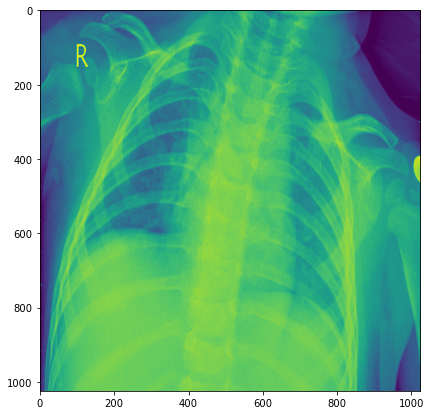

In [8]:

import imageio
import matplotlib.pyplot as plt
import numpy as np
# Project modules
from filters import filter_appliers as f
from filters import helpers as hp
from filters import color_methods as color

# filename = str(input("Enter the image name: "))
# img = imageio.imread('images/' + filename)
img = imageio.imread('images/' + 'COVID-19-Pneumonia/1.png')

# Handling third dimension of some Gray images
img = hp.trim_dimension(img)
hp.printImg(img, size=7)


### Selecting the Smoothing filter
First, we should pre-process our image by applying a **Smoothing Filter** to it.  
Select the number of the filter:

**1. Median Filter**  
**2. Gaussian Filter**

In order to simplify the inputs, the parameters are set to default values. Feel free to change them in the code below!
```py
Parameters:
        img: image to apply the filter
        n: size of the filter
        sigma: standard deviation (used only by the gaussian filter)
```

In [ ]:
selected_smoothing = int(input("Smoothing Filter number:"))
# Applying filters to the image
img_smooth = f.smoothing_filter(img, n=5, sigma=0.5, selected=selected_smoothing)

# Original Image vs Filtered Image
hp.printImg(img, size=7)
hp.printImg(img_smooth, size=7)

### Selecting the Edge Detection filter
Now we want to apply some **Edge Filter** to our image in order to improve its visibility.  
Select the number of the filter:

**1. Laplacian of Gaussian**  
**2. Sobel Operator** - might take a while to conclude

Just as before, the parameters are set to default values. Feel free to change them as you want!
```py
Parameters:
        img: image to apply the filter
        n: the size of the filter (used only by the `laplacian_of_gaussian` filter)
        sigma: standard deviation (used only by the `laplacian_of_gaussian` filter)
        selected: number of the method
```

In [ ]:
selected_edge = int(input("Edge Filter number:"))
# Applying filter to the image
img_edge = f.edge_filter(img_smooth, n=3, sigma=1, selected=selected_edge)
img_edge = hp.normalize(img_edge)

# We apply the scalar if Sobel Operator is selected in order to turn white color more visible (scalar=1 will return the original output)
scalar = 4
img_out_restored = (img_edge * scalar) if (selected_edge == 2) else img_edge



In [ ]:
selected_color = int(input("ColorMap number: "))
# Applying Color Filters
img_final = color.colorize(img_out_restored, selected=selected_color)
img_final = hp.normalize(img_final)

# img_final = color.change_contrast(img_final, k=0.025)

### Printing the results
Now that we have our output image, we must normalize it before showing the results.

### Original vs. Results

In [ ]:

# Original Image vs Filtered Image
hp.printImg(img, size=5)
hp.printImg(img_out_restored, size=5)
hp.printImg(img_final, size=5)